Found 786 files belonging to 3 classes.


2026-01-01 13:07:31.857341: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
/home/shironeko/HUST/Medical_Prediction/.venv/lib64/python3.12/site-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 12 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))



Model: DenseNet121 (LR=1e-4)
              precision    recall  f1-score   support

       COVID     0.9959    0.9796    0.9877       245
      NORMAL     0.9141    0.9815    0.9466       271
   PNEUMONIA     0.9724    0.9148    0.9427       270

    accuracy                         0.9580       786
   macro avg     0.9608    0.9587    0.9590       786
weighted avg     0.9596    0.9580    0.9581       786



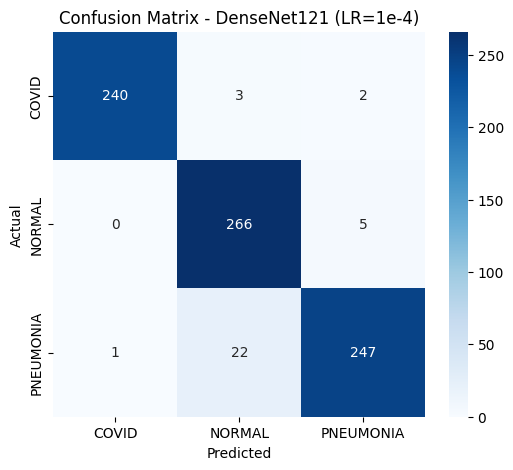

/home/shironeko/HUST/Medical_Prediction/.venv/lib64/python3.12/site-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 12 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))



Model: DenseNet121 (ReduceLR)
              precision    recall  f1-score   support

       COVID     0.9917    0.9714    0.9814       245
      NORMAL     0.9044    0.9779    0.9397       271
   PNEUMONIA     0.9644    0.9037    0.9331       270

    accuracy                         0.9504       786
   macro avg     0.9535    0.9510    0.9514       786
weighted avg     0.9522    0.9504    0.9504       786



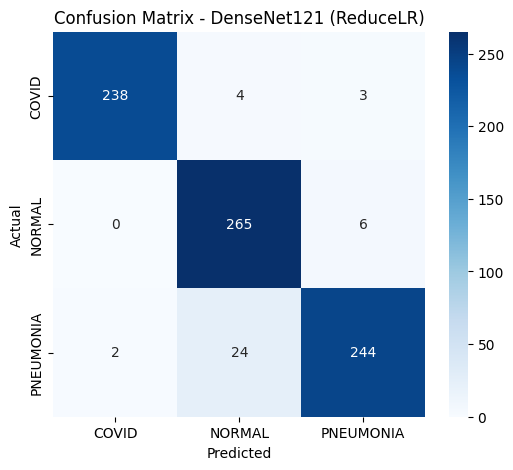

/home/shironeko/HUST/Medical_Prediction/.venv/lib64/python3.12/site-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 12 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))



Model: EfficientNetB0 (LR=1e-4)
              precision    recall  f1-score   support

       COVID     1.0000    0.9878    0.9938       245
      NORMAL     0.9175    0.9852    0.9502       271
   PNEUMONIA     0.9802    0.9185    0.9484       270

    accuracy                         0.9631       786
   macro avg     0.9659    0.9638    0.9641       786
weighted avg     0.9648    0.9631    0.9632       786



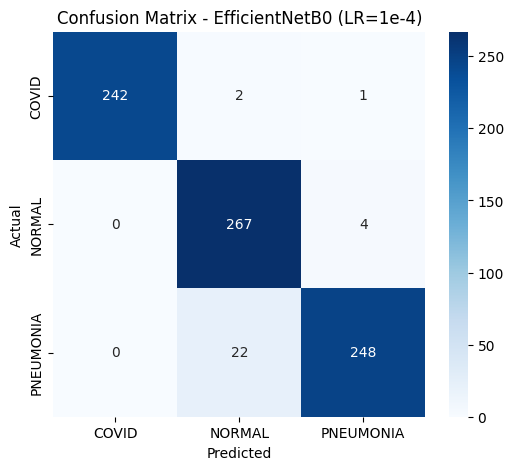

/home/shironeko/HUST/Medical_Prediction/.venv/lib64/python3.12/site-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 12 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))



Model: EfficientNetB0 (LR=1e-5)
              precision    recall  f1-score   support

       COVID     0.9917    0.9755    0.9835       245
      NORMAL     0.8406    0.9926    0.9103       271
   PNEUMONIA     0.9956    0.8296    0.9051       270

    accuracy                         0.9313       786
   macro avg     0.9426    0.9326    0.9330       786
weighted avg     0.9409    0.9313    0.9313       786



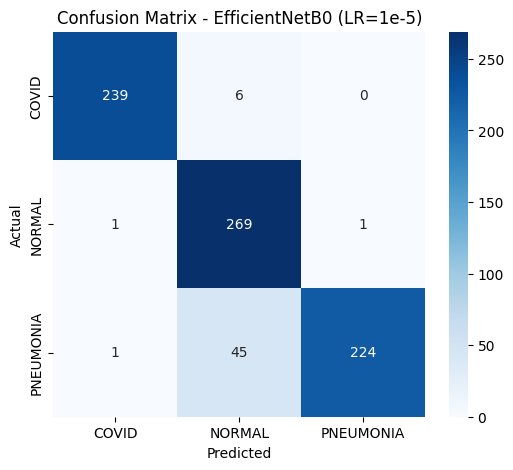

/home/shironeko/HUST/Medical_Prediction/.venv/lib64/python3.12/site-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 12 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))



Model: EfficientNetB0 (ReduceLR)
              precision    recall  f1-score   support

       COVID     0.9958    0.9755    0.9856       245
      NORMAL     0.8896    0.9815    0.9333       271
   PNEUMONIA     0.9717    0.8889    0.9284       270

    accuracy                         0.9478       786
   macro avg     0.9524    0.9486    0.9491       786
weighted avg     0.9509    0.9478    0.9479       786



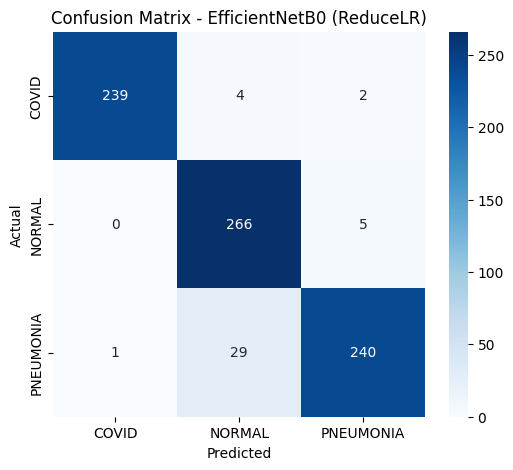

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

TEST_DIR = '../../data/images/test'
MODELS = {
    "DenseNet121 (LR=1e-4)": "../models/CV/densenet121_model.keras",
    "DenseNet121 (ReduceLR)": "../models/CV/densenet121_reducelr_model.keras",
    "EfficientNetB0 (LR=1e-4)": "../models/CV/efficientnetb0_model.keras",
    "EfficientNetB0 (LR=1e-5)": "../models/CV/efficientnetb0_v1_model.keras",
    "EfficientNetB0 (ReduceLR)": "../models/CV/efficientnetb0_v2_model.keras"
}

test_ds = tf.keras.utils.image_dataset_from_directory(
    TEST_DIR,
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical',
    shuffle=False
)
class_names = test_ds.class_names

y_true = []
for _, labels in test_ds:
    y_true.extend(np.argmax(labels.numpy(), axis=1))
y_true = np.array(y_true)

for name, path in MODELS.items():
    model = tf.keras.models.load_model(path)
    y_pred_probs = model.predict(test_ds, verbose=0)
    y_pred = np.argmax(y_pred_probs, axis=1)

    print(f"\nModel: {name}")
    print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

Found 786 files belonging to 3 classes.


/home/shironeko/HUST/Medical_Prediction/.venv/lib64/python3.12/site-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 12 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
2026-01-01 13:16:51.544554: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


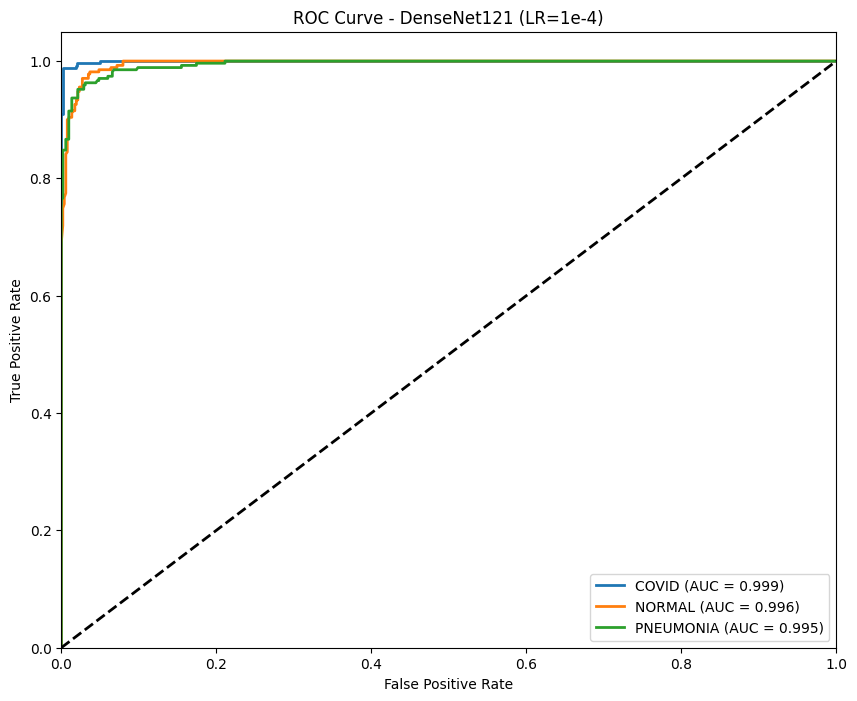

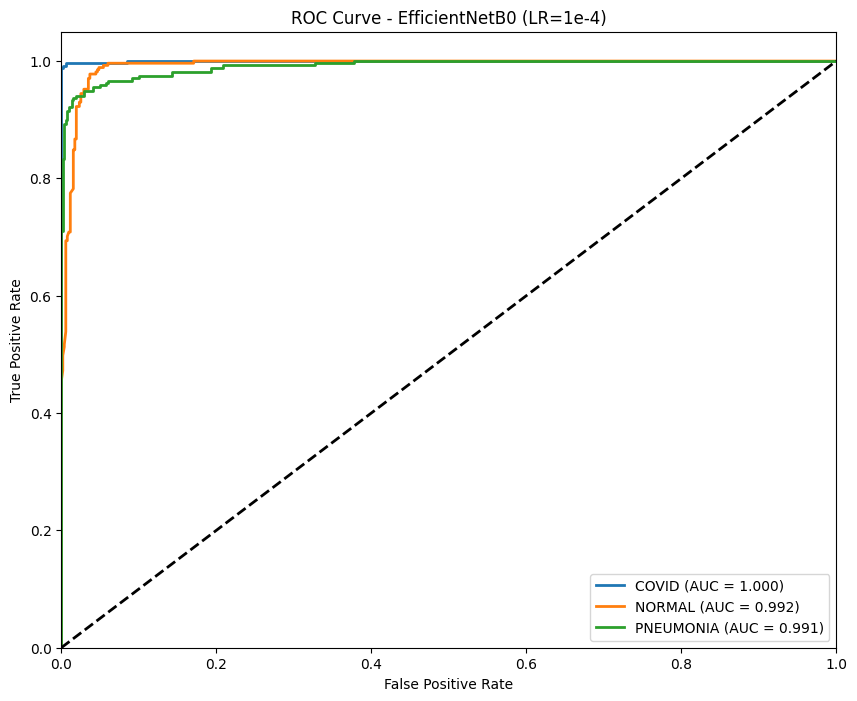

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

MODEL_DIR = '../models/CV'
TEST_DATA_DIR = '../../data/images/test'
DENSE_MODEL_NAME = 'densenet121_model.keras'
EFF_MODEL_NAME = 'efficientnetb0_model.keras'
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

test_ds = tf.keras.utils.image_dataset_from_directory(
    TEST_DATA_DIR,
    labels='inferred',
    label_mode='categorical',
    shuffle=False,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

class_names = test_ds.class_names

def get_predictions(model_name):
    full_path = os.path.join(MODEL_DIR, model_name)
    model = tf.keras.models.load_model(full_path)
    
    y_true = []
    y_pred_probs = []

    for images, labels in test_ds:
        y_true.extend(np.argmax(labels.numpy(), axis=1))
        preds = model.predict(images, verbose=0)
        y_pred_probs.extend(preds)

    return np.array(y_true), np.array(y_pred_probs)

y_true, y_pred_dense = get_predictions(DENSE_MODEL_NAME)
_, y_pred_eff = get_predictions(EFF_MODEL_NAME)

lb = LabelBinarizer()
y_true_bin = lb.fit_transform(y_true)
n_classes = len(class_names)

def plot_roc_model(y_probs, title):
    plt.figure(figsize=(10, 8))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_probs[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{class_names[i]} (AUC = {roc_auc:.3f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

plot_roc_model(y_pred_dense, 'ROC Curve - DenseNet121 (LR=1e-4)')
plot_roc_model(y_pred_eff, 'ROC Curve - EfficientNetB0 (LR=1e-4)')